In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
#     layers.Flatten(input_shape=[24, 24]),
    layers.Flatten(),

    layers.Dense(300,activation='relu'),
    layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])

from tensorflow import keras
# adam_opt = keras.optimizers.Adam(learning_rate=0.005)

f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

def const_scheduler(epoch):
    if epoch < 10:
          return 0.001
    elif epoch < 30:
          return 0.0002
    else:
          return 0.0001
callback = tf.keras.callbacks.LearningRateScheduler(const_scheduler)
train_stats = f_mnist_model.fit(train_ds, epochs=40, verbose=1, callbacks=[callback])
# train_stats = f_mnist_model.fit(train_ds, epochs=20, verbose=1)

Epoch 1/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4828 - accuracy: 0.8255 - lr: 0.0010
Epoch 2/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3646 - accuracy: 0.8669 - lr: 0.0010
Epoch 3/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3274 - accuracy: 0.8802 - lr: 0.0010
Epoch 4/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3039 - accuracy: 0.8862 - lr: 0.0010
Epoch 5/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2854 - accuracy: 0.8930 - lr: 0.0010
Epoch 6/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2700 - accuracy: 0.8989 - lr: 0.0010
Epoch 7/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2566 - accuracy: 0.9041 - lr: 0.0010
Epoch 8/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2456 - accuracy: 0.9064 - lr: 0.0010
Epoch 9/40
1688/1688 [==============================] - 6s 4ms/step - loss: 0.23

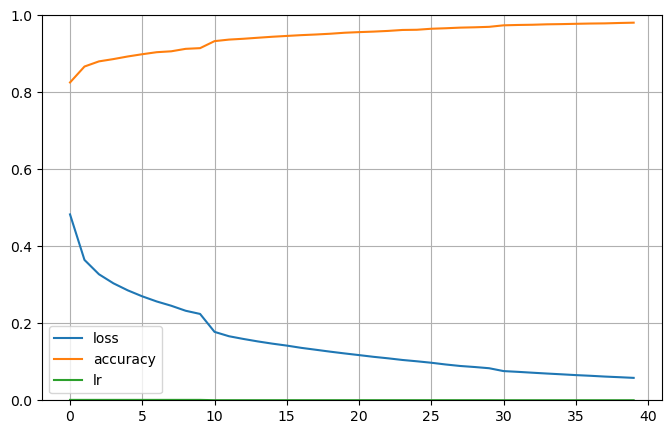

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [4]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

188/188 [==============================] - 1s 4ms/step
probs :  [4.8673181e-21 2.4818730e-19 5.7532838e-23 8.5818367e-20 2.4169355e-21
 9.0820754e-11 6.4708465e-20 9.9999994e-01 1.5278753e-14 6.9446455e-19]
klasa : 7
rzeczywista klasa:  7


In [5]:
# f_mnist_model.save('saved_model/my_model')